In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, RocCurveDisplay, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [2]:
[X, y, name]=np.load("TP1.npy", allow_pickle=True)

# cela signifier que 25% des données seront utilisées pour le test et 75% pour l'entrainement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Sachant que X resprésente les features, y les labels et name le nom des classes, déterminer la
taille des images , le nombre d’images et le nombre de classes.

- il y au total 1288 images dans la base de données
- chaque image a 2914 features
- il y a 7 personnes = 7 classes


In [3]:
print("X.shape = ", X.shape)
print("y.shape = ", y.shape) # 7 classes
print("name.shape = ", name.shape) # 7 noms

X.shape =  (1288, 2914)
y.shape =  (1288,)
name.shape =  (7,)


Partitionner la base en une base d’apprentissage et une base de test en mettant 25% des données
en test (fonction train_test_split()) pour obtenir les variables X_train, X_test, y_train et y_test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("taille base de train = ", X_train.shape)
print("taille base de test = ", X_test.shape)

print("taille label train = ", y_train.shape)
print("taille  label test = ", y_test.shape)


taille base de train =  (966, 2914)
taille base de test =  (322, 2914)
taille label train =  (966,)
taille  label test =  (322,)


## Mettre en forme les données (train et test) en utilisant la fonction classe StandardScaler.
Question : A quoi sert cette fonction, en quoi consiste la mise en forme des données ?

--> StandardScaler permet de centrer et réduire les données. Cela permet d'éviter que certaines features aient plus d'importance que d'autres.

In [5]:
#données train
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Cette fonction sert a uniformiser les données en les mettant sur une même échelle. Cela permet de faciliter la comparaison entre les données.

La mise en forme consiste a soustraire la moyenne et diviser par l'écart type.


# Classification kkp

Attention il ne faut pas scale 2 moyennes base de test et base de train : il faut calculer moyenne et ecart type sur la base de train, et ensuite scaler toutes les données avec cela

In [6]:
#classification un 1-kppv

print("distance euclidienne")
classifieur = KNeighborsClassifier(n_neighbors=1,p=2)
classifieur.fit(X_train,y_train)

#predict exemple de test
predicted = classifieur.predict(X_test)

print("Le taux du classifieur est de " , accuracy_score(y_test, predicted)*100, "%")



distance euclidienne
Le taux du classifieur est de  63.66459627329193 %


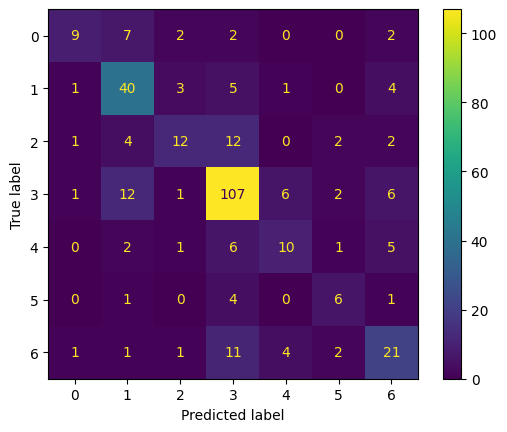

In [7]:

matrice_confusion = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(matrice_confusion).plot()

# Questions
- Que représente la matrice de confusion ? 
- Que vaut sa somme ? 
-Est-ce que les classes sont équilibrées ?
- Que représente le rapport de classification ? Retrouver chacun de ses éléments à partir de la
matrice de confusion

1) La matrice de confusion est de tailles 7*7 et représente les données après classification de la base de test.


2) Les classes ne sont pas équilibrés : on voit que la classe 3 est sureprésenté


### Retrouver les elements :

In [8]:
somme = np.sum(matrice_confusion)
print("le nombre d'element de la base de donnée de test de ", somme)

le nombre d'element de la base de donnée de test de  322


In [9]:
#rapport de classification
target_names = ['class 0', 'class 1', 'class 2', 'class 3','class 4','class 5','class 6']
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.41      0.51        22
     class 1       0.60      0.74      0.66        54
     class 2       0.60      0.36      0.45        33
     class 3       0.73      0.79      0.76       135
     class 4       0.48      0.40      0.43        25
     class 5       0.46      0.50      0.48        12
     class 6       0.51      0.51      0.51        41

    accuracy                           0.64       322
   macro avg       0.58      0.53      0.54       322
weighted avg       0.63      0.64      0.63       322



In [10]:
# pour retrouver la précision de la classe 0
#Percentage of correct positive predictions relative to total positive predictions.

nombre_exemple_classe_0 = np.sum(matrice_confusion[0])
print("precision de la classe 0 = ", matrice_confusion[0][0]/nombre_exemple_classe_0)


precision de la classe 0 =  0.4090909090909091


précision : % de True Positive qui est correct par rapport a toutes les predicitions


In [11]:

best_k = 0
max_score = 0
tab_score=[]
 #de 1 a 15
k_neighboors= np.array(range(1,100))

for k in k_neighboors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    score =  accuracy_score(y_test, predicted)
    if score> max_score:
        max_score = accuracy_score(y_test, predicted)
        best_k = k

    tab_score.append(score)

print("=============================================================")
print("Le meilleur k est ", best_k, " avec un score de ", max_score*100, "%")
print("=============================================================")


Le meilleur k est  1  avec un score de  63.66459627329193 %


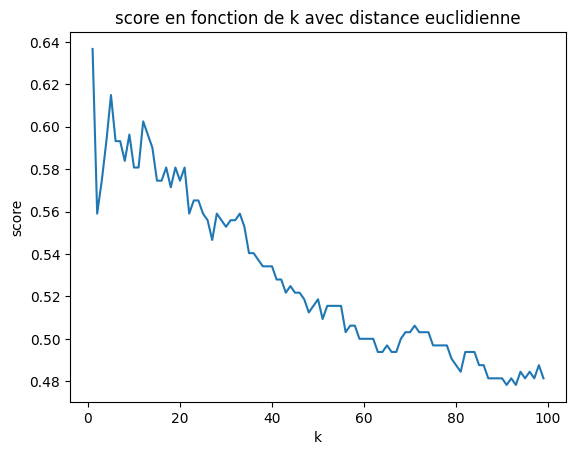

In [12]:
#tracé des courbes

import matplotlib.pyplot as plt
plt.plot(k_neighboors, tab_score)
plt.xlabel("k")
plt.ylabel("score")
plt.title("score en fonction de k avec distance euclidienne")
plt.show()


# avec la distance de Manhattan

distance Manhattan
Le taux du classifieur est de  64.59627329192547 %


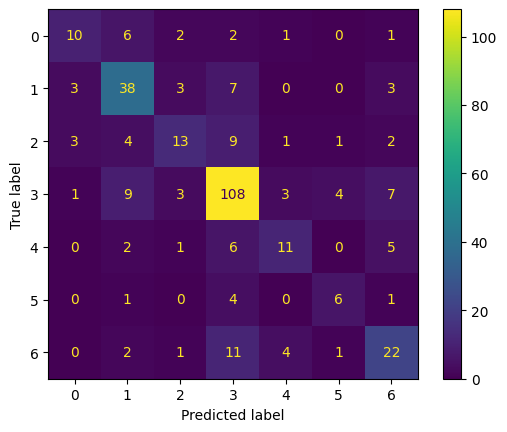

In [13]:
#classification un 1-kppv

print("distance Manhattan")
classifieur = KNeighborsClassifier(n_neighbors=1,p=1)
classifieur.fit(X_train,y_train)

#predict exemple de test
predicted = classifieur.predict(X_test)


print("Le taux du classifieur est de " , accuracy_score(y_test, predicted)*100, "%")

#matrice de confusion
from sklearn.metrics import confusion_matrix, RocCurveDisplay, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

matrice_confusion = confusion_matrix(y_test, predicted)

cm_display = ConfusionMatrixDisplay(matrice_confusion).plot()


Le meilleur k est  1  avec un score de  64.59627329192547 %


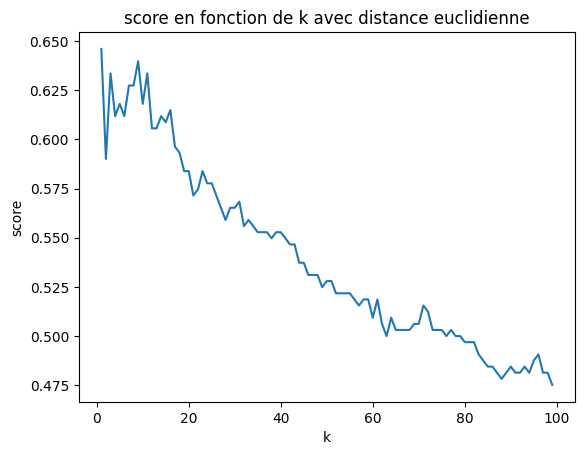

In [14]:

best_k = 0
max_score = 0
tab_score=[]
 #de 1 a 15
k_neighboors= np.array(range(1,100))

for k in k_neighboors:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    score =  accuracy_score(y_test, predicted)
    if score> max_score:
        max_score = accuracy_score(y_test, predicted)
        best_k = k

    tab_score.append(score)

print("=============================================================")
print("Le meilleur k est ", best_k, " avec un score de ", max_score*100, "%")
print("=============================================================")


plt.plot(k_neighboors, tab_score)
plt.xlabel("k")
plt.ylabel("score")
plt.title("score en fonction de k avec distance euclidienne")
plt.show()

# Analyse en composantes principales et classification


methode : on commence avec n_components assez grand, et on recupere les valeurs propres. On trace ensuite en fonctions des dimensions.

somme des valeurs propres =  1.0
nombre de valeurs propres pour expliquer 95% de la variance =  155


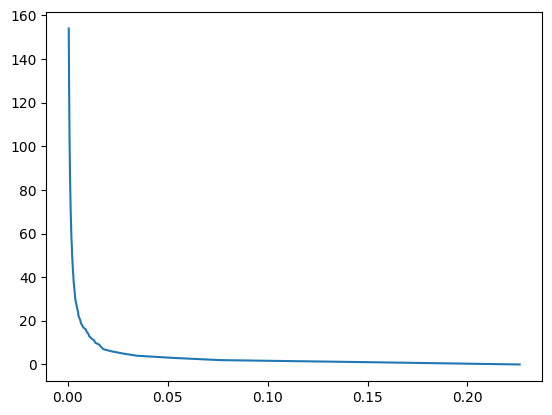

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=966)
pca.fit(X_train) #juste sur la base de train
#on ne peut pas mettre plus que le nombre de features car

#Percentage of variance explained by each of the selected components.
eigenvalues = pca.explained_variance_ratio_
# valeurs propres normalisées a 1 : somme des valeurs propres = 1
#on cherche donc les n premieres valeurs propres qui expliquent 95% de la variance
print("somme des valeurs propres = ", np.sum(eigenvalues))

n=0
while np.sum(eigenvalues[0:n])<0.95:
    n+=1
print("nombre de valeurs propres pour expliquer 95% de la variance = ", n)



#tracé des valeurs propres en fonction des domensios
valeur_propre = pca.explained_variance_ratio_

plt.plot(valeur_propre[0:n], np.arange(0,n))

#on refais la classification en prenant compte la reduction de dimensions

In [16]:
pca = PCA(n_components=n)
pca.fit(X_train) 


X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#classification un 1-kppv avec Manhattan
knn = KNeighborsClassifier(n_neighbors=1,p=1)
knn.fit(X_train_pca, y_train)
predicted = knn.predict(X_test_pca)
score =  accuracy_score(y_test, predicted)
print("Le taux du classifieur est de " , score*100, "%")


Le taux du classifieur est de  68.94409937888199 %


Text(0, 0.5, 'score')

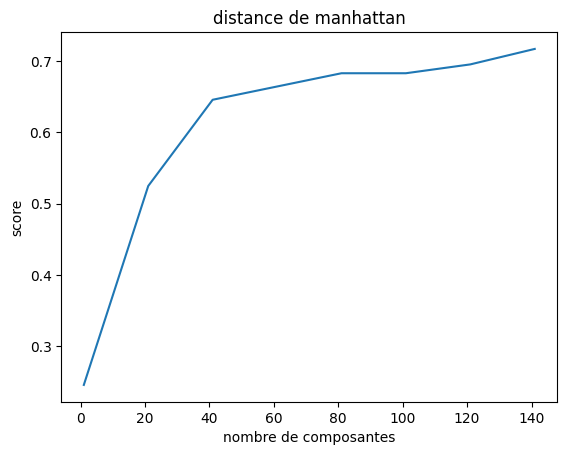

In [17]:
#on fait varier de 10 en 10 le nombre de composantes

components = np.array(range(1,n,20))
tab_score = []

for n_components in components:
    pca = PCA(n_components=n_components)
    pca.fit(X_train) 
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=1,p=1)
    knn.fit(X_train_pca, y_train)
    predicted = knn.predict(X_test_pca)
    score =  accuracy_score(y_test, predicted)
    tab_score.append(score)

plt.plot(components, tab_score)
plt.title("distance de manhattan")
plt.xlabel("nombre de composantes")
plt.ylabel("score")

Text(0, 0.5, "temps d'execution")

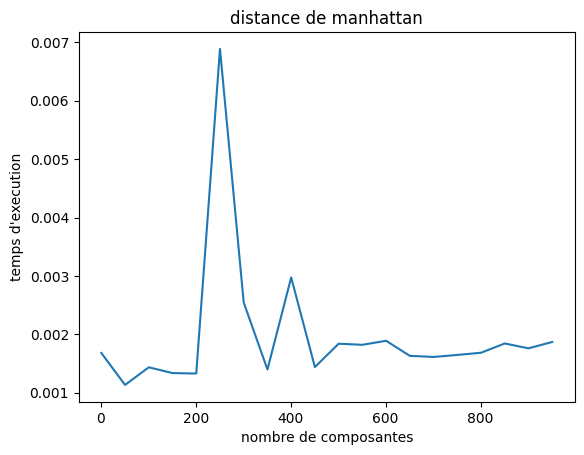

In [18]:
#mesure des temps d'execution

import time

temps = []
components = np.array(range(1,966,50))


for n_components in components:
    pca = PCA(n_components=n_components)
    pca.fit(X_train) 
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=1,p=1)
    start = time.time()
    knn.fit(X_train_pca, y_train)
    end = time.time()
    temps.append(end-start)


plt.plot(components, temps)
plt.title("distance de manhattan")
plt.xlabel("nombre de composantes")
plt.ylabel("temps d'execution")


**conclusion : plus on garde un nombre important de composants, plus le score est elevée car on a plus de dimensions**

# Questions

- Que représentent les valeurs renvoyées par pca.explained_variance_ratio_ ?

__pca.explained_variance_ratio_ renvoie les variances pour chaque axe.__

- Combien de composantes sont nécessaire pour avoir une bonne classification

__il faut garder les n premieres composantes qui assurent que l'on garde au minimum 0.9 % de la variance (information)__



- Comment varient les temps de calcul en fonction du nombre de composantes ?

plus il y a de dimensions, plus le temps de calcul monte

In [19]:
pca = PCA(n_components=50)
pca.fit(X_train) 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1,p=1)
knn.fit(X_train_pca, y_train)


#recuperer les vecteurs propres

eigenvalues = pca.components_

print("eigenvalues.shape = ", eigenvalues.shape)

eigenvalues = np.reshape(eigenvalues, (50,62,47))
#reshape chaque vecteur propre en une image de 28*28



eigenvalues.shape =  (50, 2914)


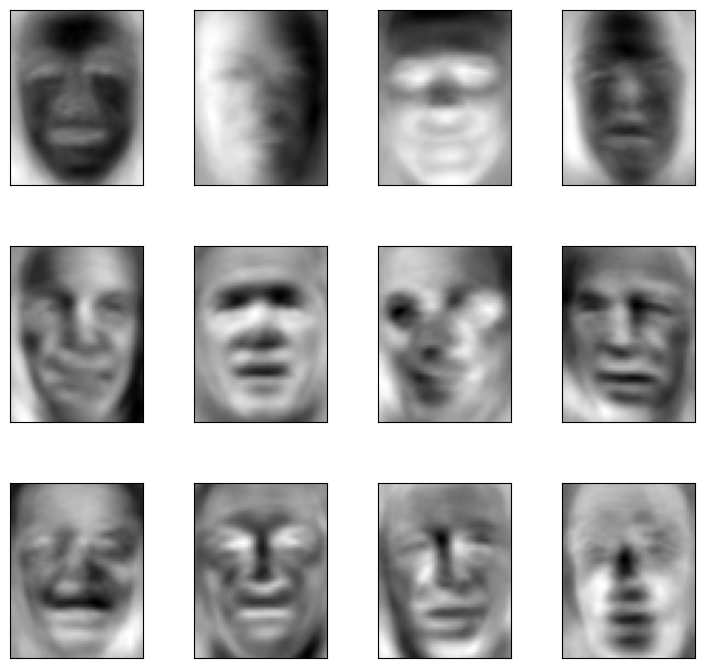

In [20]:

def plot_gallery(images):
	#	Affiche les 12 premières images contenues dans images
	#	images est de taille Nb image*Ny*Nx
    plt.figure(figsize=(7.2, 7.2))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()


plot_gallery(eigenvalues)

Les vecteurs propres sont de dimension  (1,2914). Il y en a 50 ( 50 axes ou il y a le plus de variance des données). Ils représentent les axes principaux de la base de données.

on a gardé donc 50 vecteurs propres de taille (1,2914) : chaque image est une combinaison linéaire de ces 50 vecteurs propres, representée par par un vecteur de taille 50.

[x1, ..., x50] : chaque xi est un coefficient de combinaison linéaire


Pour reconstruire les images de test, on utilise la fonction inverse_transform() de la classe PCA. 



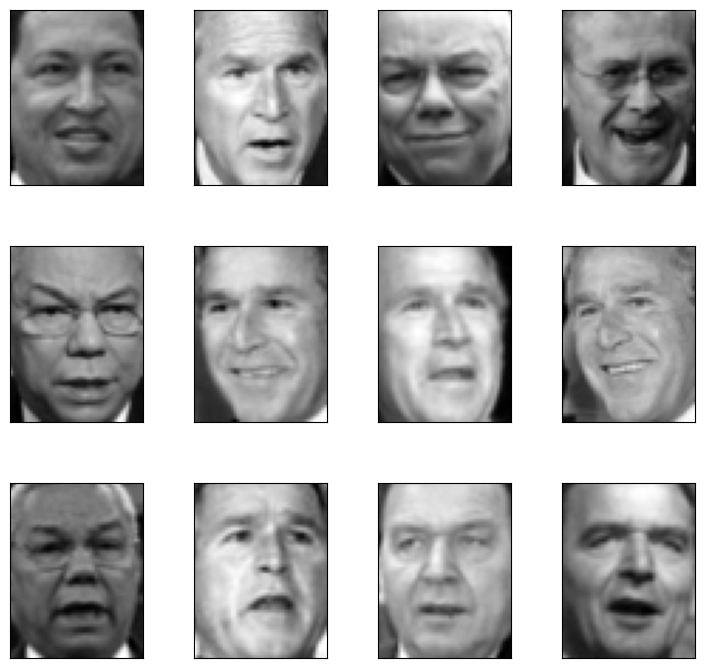

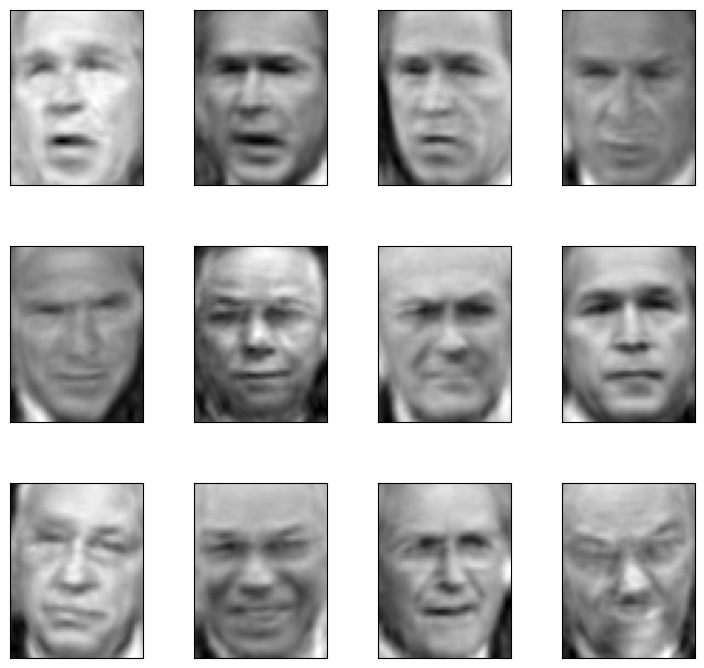

In [21]:

#methode poour reconstruire les images

[X, y, name]=np.load("TP1.npy", allow_pickle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

plot_gallery(X_train[0:12].reshape(12,62,47))

#scale pca puis inverse pca

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#pca

pca = PCA(n_components=150)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#on veut reconstruire chaque image de la base de test selon les 50 composantes principales
#on va donc faire la transformée inverse de pca sur les 50 composantes principales

X_test_reconstruit = pca.inverse_transform(X_test_pca)

#de scale
X_test_reconstruit = scaler.inverse_transform(X_test_reconstruit)
plot_gallery(X_test_reconstruit[0:12].reshape(12,62,47))

In [22]:
taux_compression = 1 - (50/2914)
print("taux de compression = ", taux_compression*100, "%")

taux de compression =  98.28414550446122 %


Faire varier le nombre de composantes conservées et calculer l’erreur de reconstruction (norme
L2). Afficher l’erreur de reconstruction en fonction du nombre de composantes.

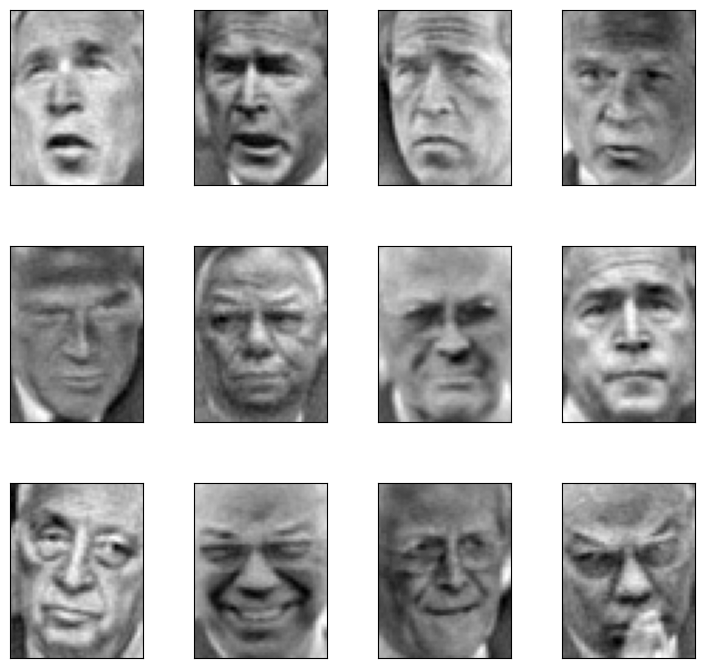

In [23]:

[X, y, name]=np.load("TP1.npy", allow_pickle=True)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#pca

pca = PCA(n_components=966)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_test_reconstruit = pca.inverse_transform(X_test_pca)


X_test_reconstruit = scaler.inverse_transform(X_test_reconstruit)
plot_gallery(X_test_reconstruit[0:12].reshape(12,62,47))

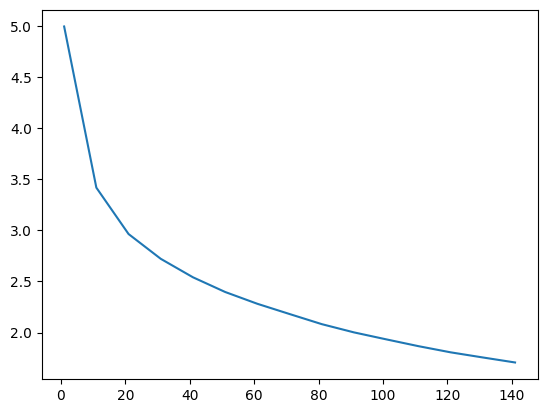

In [24]:
composantes = np.array(range(1,150,10))
erreur_reconstruction = []

for nb_dimensions in composantes:
    #on fait la pca
    pca = PCA(n_components=nb_dimensions)
    pca.fit(X_train)
    X_test_pca = pca.transform(X_test)

    #on veut reconstruire chaque image de la base de test selon les 50 composantes principales
    #on va donc faire la transformée inverse de pca sur les 50 composantes principales

    X_test_reconstruit = pca.inverse_transform(X_test_pca)
    error = np.sum((X_test - X_test_reconstruit)**2) #erreur de toutes les images

    #on scale
    error = np.sqrt(error/np.sum(X_test)) #erreur moyenne
    erreur_reconstruction.append(error)

plt.plot(composantes, erreur_reconstruction)


#reconstruction = decompression de nos images

#on fait la pca : on passe de 2000 dimensions a 50 : on a 50 vecteurs propres
# chaque image est une combinaison lineaire de ces 50 vecteurs propres
# transformée inverse pour reussir a exprimer a1* V1 + a2*V2 + ... + a50*V50
# on a une image reconstruite avec a nouveau 2000 dimensions = décompression


 #principe
